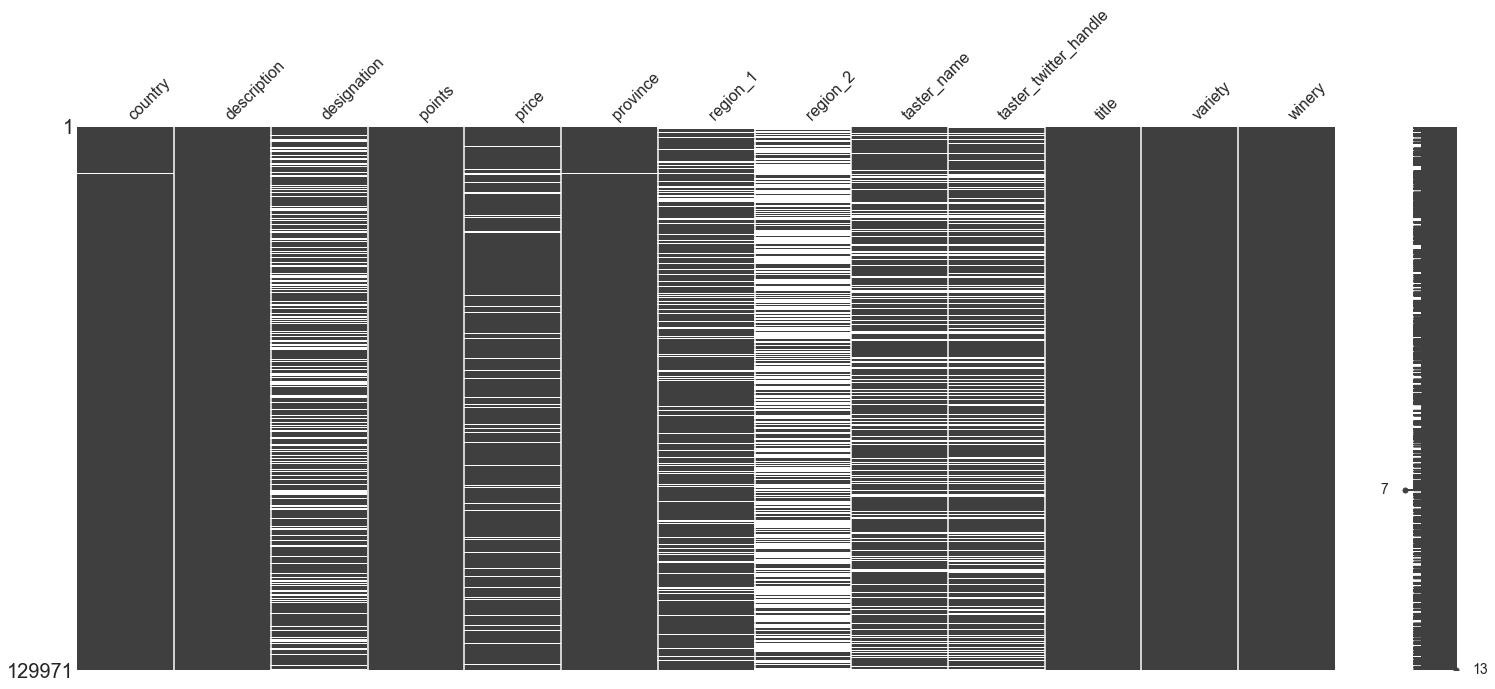

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [8]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None) # To display all columns
pd.set_option("display.max_rows",100)

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
sns.set_style('whitegrid') 

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

data = pd.read_csv("C:/Users/Jason/Desktop/Python Projects/Datasets/wine130k.csv", low_memory=False, index_col=0)
data2 = pd.read_csv("C:/Users/Jason/Desktop/Python Projects/Datasets/wine150k.csv", low_memory=False, index_col=0)
#we will look at data2 later

data.describe

import missingno as msno
msno.matrix(data)
data.isnull().sum()

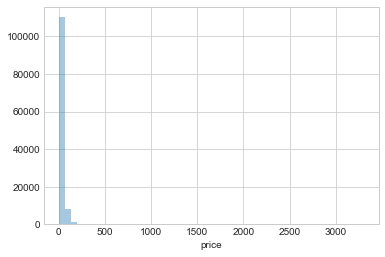

In [24]:
#x= pd.DataFrame(data=data,columns=["price"])
#x.mean()
#lets try replacing NaNs with mean

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
data[['price']] = imputer.fit_transform(data[['price']])

sns.distplot(data['price'], kde=False)
#What is the distribution of price, best way to fill NaN? (mean, KNN priceXpoints, drop rows?)

In [77]:
from collections import Counter
freqs= Counter(data["variety"])
#freqs
pd.DataFrame(data=data, columns=["variety","points","price","country"])

,variety,points,price,country
0,White Blend,87,NaN,Italy
1,Portuguese Red,87,15.0,Portugal
2,Pinot Gris,87,14.0,US
3,Riesling,87,13.0,US
4,Pinot Noir,87,65.0,US
5,Tempranillo-Merlot,87,15.0,Spain
6,Frappato,87,16.0,Italy
7,Gewürztraminer,87,24.0,France
8,Gewürztraminer,87,12.0,Germany
9,Pinot Gris,87,27.0,France


In [10]:

# remove duplicates
data.drop_duplicates(inplace=True)
#data.shape (119988,13)

(119988, 13)

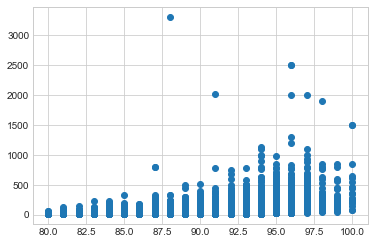

In [7]:
plt.scatter(data.points, data.price)

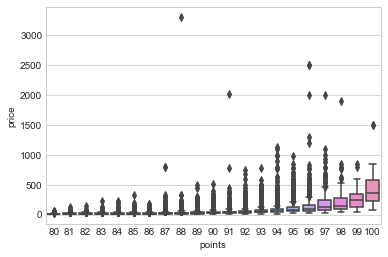

In [8]:
sns.boxplot(data.points, data.price)

It appears that the average price of wine is higher as the rating increases. Could also be stated as: the rating increases as the price increases. Tasters might be biased in their reviews if they know the price of the wine. Alternatively, wines that previously received positive reviews might tend to get priced higher because of these good reviews. Or could be due to higher quality harvesting, technology, or better technique which reflects in the pricing.

In [9]:
#data[data.price<=10]
data[data.price>=2000]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


In [10]:
data.groupby("variety").agg(['mean', 'median', 'min', 'max','count'])

points                           price         \
                              mean median min max count       mean median   
variety                                                                     
Abouriou                 87.666667   87.0  85  91     3  35.000000   15.0   
Agiorgitiko              86.982143   87.0  83  92    56  23.767857   19.5   
Aglianico                89.271386   89.0  81  97   339  39.459854   34.0   
Aidani                   82.000000   82.0  82  82     1  27.000000   27.0   
Airen                    81.666667   82.0  80  83     3   9.000000    9.0   
Albana                   89.428571   89.0  84  94    21  23.944444   20.0   
Albanello                86.000000   86.0  86  86     1  20.000000   20.0   
Albariño                 87.711982   88.0  80  94   434  21.310185   20.0   
Albarossa                88.000000   88.0  88  88     1  40.000000   40.0   
Aleatico                 86.600000   86.0  83  90     5  39.750000   39.5   
Alfrocheiro              88.857143   89.0  85  93    14  27.928571   28.5   
Alicante                 87.400000   87.0  86  89     5  23.000000   24.0   
Alicante Bouschet        89.354167   90.0  83  93    48  31.326087   20.0   
Aligoté                  86.333333   87.0  84  91    27  19.307692   18.5   
Alsace white blend       90.320000   90.0  84  96    50  29.895833   23.5   
Altesse                  88.833333   89.0  87  90     6  17.666667   18.0   
Alvarelhão               86.500000   86.5  85  88     2  21.000000   21.0   
Alvarinho                88.747967   89.0  82  93   123  19.431373   17.5   
Alvarinho-Chardonnay     87.000000   87.0  85  88     5  11.250000   10.5   
Ansonica                 86.500000   86.5  86  87     2  26.000000   26.0   
Antão Vaz                87.800000   88.0  85  90    15  20.200000   20.0   
Apple                    89.000000   89.0  89  89     2  29.000000   29.0   
Aragonez                 87.333333   88.0  83  91     9  21.200000   24.0   
Aragonês                 88.666667   89.0  86  91     9  31.166667   19.5   
Argaman                  88.333333   88.0  86  91     3  40.666667   38.0   
Arinto                   87.100000   87.0  83  92    70  16.100000   14.0   
Arneis                   87.246753   87.0  84  92    77  20.915493   20.0   
Asprinio                 84.000000   84.0  83  85     3  15.000000   15.0   
Assyrtico                88.051282   88.0  84  92    39  23.153846   21.0   
Assyrtiko                89.187500   89.0  86  93    16  23.000000   22.0   
Athiri                   83.000000   83.0  83  83     1  18.000000   18.0   
Austrian Red Blend       89.559322   90.0  83  94    59  35.647059   30.0   
Austrian white blend     90.319444   90.0  85  96    72  33.000000   25.0   
Auxerrois                88.769231   89.0  84  91    26  22.347826   22.0   
Avesso                   88.000000   88.0  87  89     6  16.333333   14.0   
Azal                     86.000000   86.0  85  87     3  13.666667   13.0   
Babić                    88.500000   88.5  88  89     4  35.000000   32.0   
Babosa Negro             92.000000   92.0  92  92     1  45.000000   45.0   
Bacchus                  91.000000   91.0  91  91     1        NaN    NaN   
Baco Noir                86.000000   86.0  83  91    15  26.266667   26.0   
Baga                     90.230769   90.0  86  93    26  36.920000   30.0   
Baga-Touriga Nacional    91.000000   91.0  91  91     2  40.000000   40.0   
Barbera                  87.746894   88.0  80  94   644  26.212844   25.0   
Barbera-Nebbiolo         87.000000   87.0  87  87     1  30.000000   30.0   
Bastardo                 85.500000   85.5  85  86     2  20.500000   20.5   
Biancale                 85.000000   85.0  85  85     1  18.000000   18.0   
Biancolella              85.000000   85.0  85  85     1  26.000000   26.0   
Biancu Gentile           89.000000   89.0  89  89     1        NaN    NaN   
Bical                    86.384615   86.0  84  90    13  15.250000   12.0   
Black Monukka           

In [11]:
data.groupby("variety").mean().sort_values(by = "price", ascending = False)

,points,price
variety,,
Ramisco,93.000000,495.000000
Terrantez,95.000000,236.000000
Francisa,91.000000,160.000000
Rosenmuskateller,92.500000,150.000000
Malbec-Cabernet,91.666667,113.333333
Tinta Negra Mole,92.000000,112.000000
Muscadelle,92.500000,111.200000
Bual,94.142857,100.000000
Cabernet-Shiraz,91.000000,83.500000


In [12]:
data.groupby("variety").points.count().sort_values(ascending = False)

variety
Pinot Noir                       12278
Chardonnay                       10868
Cabernet Sauvignon                8840
Red Blend                         8243
Bordeaux-style Red Blend          6471
Riesling                          4773
Sauvignon Blanc                   4575
Syrah                             3828
Rosé                              3220
Merlot                            2896
Nebbiolo                          2607
Zinfandel                         2530
Sangiovese                        2462
Malbec                            2446
Portuguese Red                    2282
White Blend                       2179
Sparkling Blend                   1971
Tempranillo                       1671
Rhône-style Red Blend             1343
Pinot Gris                        1324
Champagne Blend                   1308
Cabernet Franc                    1243
Grüner Veltliner                  1201
Portuguese White                  1057
Bordeaux-style White Blend         993
Pinot Grigio     

IndexError: too many indices for array

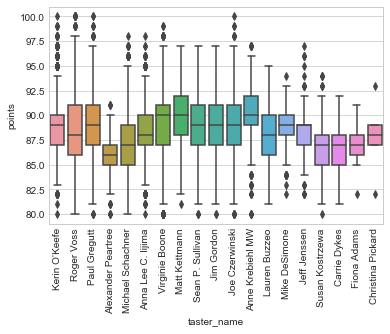

In [76]:
data.groupby("taster_name").points.agg("mean").sort_values(ascending=False)

korinsnika= 
osiguranika = sns.boxplot(data.taster_name, data.points)
plt.xticks(rotation=90)
fig, axs = plt.subplots(1,2)

korisnika.plot(ax=axs[0,0])
osiguranika.scatter(ax=axs[0,1])